In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
def get_currency_df(url, date):
    r = requests.get(url)

    bs = BeautifulSoup(r.content, 'lxml')    
    table = bs.find('table', {'id': 'historicalRateTbl'})
    
    df = pd.read_html(str(table))[0]
    df.drop(['USD per Unit'], 1, inplace=True)
    df.columns = ['Code', 'Name', 'Units per USD']
    df['Date'] = date
    return df

In [54]:
date = datetime.datetime.now()
print(date.year, date.month, date.day)

dfs = []
error_counter = 0
counter = 0
while counter<1000:
    try:
        _date = date + datetime.timedelta(days = -1*counter)

        url = 'https://www.xe.com/currencytables/?from=USD&date=' +  \
              str(_date.year) + '-' + "{:02}".format(_date.month) + '-' + \
              "{:02}".format(_date.day)
    
        _date = str(_date.year) + '-' + "{:02}".format(_date.month) + '-' + \
                "{:02}".format(_date.day)
        
        df = get_currency_df(url, _date)
        df = df.pivot(index = 'Date', columns='Code', values='Units per USD')
        dfs.append(df)
        
        print(counter, _date, url)
        
        counter += 1
        error_counter = 0
    except:
        error_counter += 1
        if error_counter >= 5: 
            break
        
    
historical_data = pd.concat(dfs)
historical_data = historical_data.rename_axis(None, axis=1).reset_index() 
historical_data

2018 7 18
0 2018-07-18 https://www.xe.com/currencytables/?from=USD&date=2018-07-18
1 2018-07-17 https://www.xe.com/currencytables/?from=USD&date=2018-07-17
2 2018-07-16 https://www.xe.com/currencytables/?from=USD&date=2018-07-16
3 2018-07-15 https://www.xe.com/currencytables/?from=USD&date=2018-07-15
4 2018-07-14 https://www.xe.com/currencytables/?from=USD&date=2018-07-14
5 2018-07-13 https://www.xe.com/currencytables/?from=USD&date=2018-07-13
6 2018-07-12 https://www.xe.com/currencytables/?from=USD&date=2018-07-12
7 2018-07-11 https://www.xe.com/currencytables/?from=USD&date=2018-07-11
8 2018-07-10 https://www.xe.com/currencytables/?from=USD&date=2018-07-10
9 2018-07-09 https://www.xe.com/currencytables/?from=USD&date=2018-07-09
10 2018-07-08 https://www.xe.com/currencytables/?from=USD&date=2018-07-08
11 2018-07-07 https://www.xe.com/currencytables/?from=USD&date=2018-07-07
12 2018-07-06 https://www.xe.com/currencytables/?from=USD&date=2018-07-06
13 2018-07-05 https://www.xe.com/curre

109 2018-03-31 https://www.xe.com/currencytables/?from=USD&date=2018-03-31
110 2018-03-30 https://www.xe.com/currencytables/?from=USD&date=2018-03-30
111 2018-03-29 https://www.xe.com/currencytables/?from=USD&date=2018-03-29
111 2018-03-29 https://www.xe.com/currencytables/?from=USD&date=2018-03-29
112 2018-03-28 https://www.xe.com/currencytables/?from=USD&date=2018-03-28
112 2018-03-28 https://www.xe.com/currencytables/?from=USD&date=2018-03-28
113 2018-03-27 https://www.xe.com/currencytables/?from=USD&date=2018-03-27
114 2018-03-26 https://www.xe.com/currencytables/?from=USD&date=2018-03-26
115 2018-03-25 https://www.xe.com/currencytables/?from=USD&date=2018-03-25
116 2018-03-24 https://www.xe.com/currencytables/?from=USD&date=2018-03-24
117 2018-03-23 https://www.xe.com/currencytables/?from=USD&date=2018-03-23
118 2018-03-22 https://www.xe.com/currencytables/?from=USD&date=2018-03-22
119 2018-03-21 https://www.xe.com/currencytables/?from=USD&date=2018-03-21
120 2018-03-20 https://ww

195 2018-01-04 https://www.xe.com/currencytables/?from=USD&date=2018-01-04
196 2018-01-03 https://www.xe.com/currencytables/?from=USD&date=2018-01-03
197 2018-01-02 https://www.xe.com/currencytables/?from=USD&date=2018-01-02
198 2018-01-01 https://www.xe.com/currencytables/?from=USD&date=2018-01-01
198 2018-01-01 https://www.xe.com/currencytables/?from=USD&date=2018-01-01
199 2017-12-31 https://www.xe.com/currencytables/?from=USD&date=2017-12-31
200 2017-12-30 https://www.xe.com/currencytables/?from=USD&date=2017-12-30
200 2017-12-30 https://www.xe.com/currencytables/?from=USD&date=2017-12-30
201 2017-12-29 https://www.xe.com/currencytables/?from=USD&date=2017-12-29
202 2017-12-28 https://www.xe.com/currencytables/?from=USD&date=2017-12-28
202 2017-12-28 https://www.xe.com/currencytables/?from=USD&date=2017-12-28
203 2017-12-27 https://www.xe.com/currencytables/?from=USD&date=2017-12-27
204 2017-12-26 https://www.xe.com/currencytables/?from=USD&date=2017-12-26
205 2017-12-25 https://ww

287 2017-10-04 https://www.xe.com/currencytables/?from=USD&date=2017-10-04
287 2017-10-04 https://www.xe.com/currencytables/?from=USD&date=2017-10-04
288 2017-10-03 https://www.xe.com/currencytables/?from=USD&date=2017-10-03
289 2017-10-02 https://www.xe.com/currencytables/?from=USD&date=2017-10-02
290 2017-10-01 https://www.xe.com/currencytables/?from=USD&date=2017-10-01
291 2017-09-30 https://www.xe.com/currencytables/?from=USD&date=2017-09-30
292 2017-09-29 https://www.xe.com/currencytables/?from=USD&date=2017-09-29
293 2017-09-28 https://www.xe.com/currencytables/?from=USD&date=2017-09-28
294 2017-09-27 https://www.xe.com/currencytables/?from=USD&date=2017-09-27
295 2017-09-26 https://www.xe.com/currencytables/?from=USD&date=2017-09-26
296 2017-09-25 https://www.xe.com/currencytables/?from=USD&date=2017-09-25
297 2017-09-24 https://www.xe.com/currencytables/?from=USD&date=2017-09-24
297 2017-09-24 https://www.xe.com/currencytables/?from=USD&date=2017-09-24
298 2017-09-23 https://ww

377 2017-07-06 https://www.xe.com/currencytables/?from=USD&date=2017-07-06
378 2017-07-05 https://www.xe.com/currencytables/?from=USD&date=2017-07-05
379 2017-07-04 https://www.xe.com/currencytables/?from=USD&date=2017-07-04
380 2017-07-03 https://www.xe.com/currencytables/?from=USD&date=2017-07-03
380 2017-07-03 https://www.xe.com/currencytables/?from=USD&date=2017-07-03
381 2017-07-02 https://www.xe.com/currencytables/?from=USD&date=2017-07-02
382 2017-07-01 https://www.xe.com/currencytables/?from=USD&date=2017-07-01
383 2017-06-30 https://www.xe.com/currencytables/?from=USD&date=2017-06-30
384 2017-06-29 https://www.xe.com/currencytables/?from=USD&date=2017-06-29
385 2017-06-28 https://www.xe.com/currencytables/?from=USD&date=2017-06-28
386 2017-06-27 https://www.xe.com/currencytables/?from=USD&date=2017-06-27
387 2017-06-26 https://www.xe.com/currencytables/?from=USD&date=2017-06-26
388 2017-06-25 https://www.xe.com/currencytables/?from=USD&date=2017-06-25
389 2017-06-24 https://ww

470 2017-04-04 https://www.xe.com/currencytables/?from=USD&date=2017-04-04
471 2017-04-03 https://www.xe.com/currencytables/?from=USD&date=2017-04-03
472 2017-04-02 https://www.xe.com/currencytables/?from=USD&date=2017-04-02
473 2017-04-01 https://www.xe.com/currencytables/?from=USD&date=2017-04-01
474 2017-03-31 https://www.xe.com/currencytables/?from=USD&date=2017-03-31
474 2017-03-31 https://www.xe.com/currencytables/?from=USD&date=2017-03-31
475 2017-03-30 https://www.xe.com/currencytables/?from=USD&date=2017-03-30
475 2017-03-30 https://www.xe.com/currencytables/?from=USD&date=2017-03-30
476 2017-03-29 https://www.xe.com/currencytables/?from=USD&date=2017-03-29
477 2017-03-28 https://www.xe.com/currencytables/?from=USD&date=2017-03-28
478 2017-03-27 https://www.xe.com/currencytables/?from=USD&date=2017-03-27
479 2017-03-26 https://www.xe.com/currencytables/?from=USD&date=2017-03-26
480 2017-03-25 https://www.xe.com/currencytables/?from=USD&date=2017-03-25
481 2017-03-24 https://ww

561 2017-01-03 https://www.xe.com/currencytables/?from=USD&date=2017-01-03
562 2017-01-02 https://www.xe.com/currencytables/?from=USD&date=2017-01-02
563 2017-01-01 https://www.xe.com/currencytables/?from=USD&date=2017-01-01
564 2016-12-31 https://www.xe.com/currencytables/?from=USD&date=2016-12-31
565 2016-12-30 https://www.xe.com/currencytables/?from=USD&date=2016-12-30
566 2016-12-29 https://www.xe.com/currencytables/?from=USD&date=2016-12-29
567 2016-12-28 https://www.xe.com/currencytables/?from=USD&date=2016-12-28
568 2016-12-27 https://www.xe.com/currencytables/?from=USD&date=2016-12-27
569 2016-12-26 https://www.xe.com/currencytables/?from=USD&date=2016-12-26
570 2016-12-25 https://www.xe.com/currencytables/?from=USD&date=2016-12-25
571 2016-12-24 https://www.xe.com/currencytables/?from=USD&date=2016-12-24
572 2016-12-23 https://www.xe.com/currencytables/?from=USD&date=2016-12-23
573 2016-12-22 https://www.xe.com/currencytables/?from=USD&date=2016-12-22
574 2016-12-21 https://ww

,Date,AED,AFN,ALL,AMD,ANG,AOA,ARS,AUD,AWG,...,XCD,XDR,XOF,XPD,XPF,XPT,YER,ZAR,ZMW,ZWD
0,2018-07-18,3.672500,72.792917,108.216250,480.297863,1.799734,255.170691,27.626219,1.351804,1.79,...,2.702382,0.713790,563.417686,0.001099,102.496984,0.001224,250.232709,13.272643,10.071741,361.9
1,2018-07-17,3.672500,72.489892,107.796775,480.782007,1.802300,253.551207,27.472718,1.352367,1.79,...,2.702470,0.712023,561.706161,0.001091,102.185623,0.001220,250.265829,13.228461,10.061097,361.9
2,2018-07-16,3.672500,72.506126,107.677255,481.140382,1.795706,255.059062,27.252478,1.348483,1.79,...,2.702471,0.710761,560.177196,0.001084,101.907474,0.001217,250.344465,13.234605,9.953988,361.9
3,2018-07-15,3.672500,72.259905,107.900002,481.170013,1.842500,254.529657,27.197971,1.346785,1.79,...,2.698076,0.713272,561.267740,0.001065,102.105866,0.001208,249.767739,13.308163,9.950249,361.9
4,2018-07-14,3.672500,72.259828,107.900002,481.170013,1.842500,254.527031,27.197557,1.346738,1.79,...,2.698076,0.713272,561.272422,0.001063,102.106717,0.001207,249.769833,13.305491,9.950249,361.9
5,2018-07-13,3.672500,72.226452,107.897438,481.465258,1.800246,254.532783,27.207153,1.349437,1.79,...,2.702470,0.712168,562.083899,0.001064,102.254341,0.001209,250.304005,13.288645,9.915379,361.9
6,2018-07-12,3.672500,72.647242,107.896159,482.214087,1.790899,253.015559,27.085600,1.347832,1.79,...,2.702471,0.711299,561.006670,0.001049,102.058372,0.001183,250.383077,13.241295,9.784787,361.9
7,2018-07-11,3.672500,72.649821,107.280809,482.271649,1.791060,253.759786,27.549421,1.351576,1.79,...,2.702471,0.709997,559.606618,0.001064,101.803674,0.001202,250.305328,13.497521,9.765770,361.9
8,2018-07-10,3.672500,73.216757,107.061198,482.590572,1.796107,252.726831,27.580569,1.339595,1.79,...,2.702471,0.709300,559.122747,0.001058,101.715648,0.001188,250.325967,13.337794,9.779096,361.9
9,2018-07-09,3.672500,73.253465,107.056159,483.119058,1.793391,249.161381,27.916978,1.339396,1.79,...,2.702471,0.707898,558.616941,0.001045,101.623632,0.001179,250.279272,13.383822,9.764264,361.9


In [55]:
historical_data.columns[1:]

Index(['AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG', 'AZN',
       ...
       'XCD', 'XDR', 'XOF', 'XPD', 'XPF', 'XPT', 'YER', 'ZAR', 'ZMW', 'ZWD'],
      dtype='object', length=166)

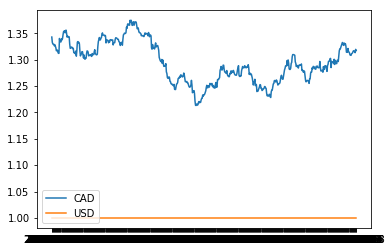

In [1134]:
plt.figure()

for i in ['CAD', 'USD']: #historical_data.columns[1:]:
    plt.plot(historical_data['Date'], historical_data[i])

plt.legend(loc=3)
plt.show()

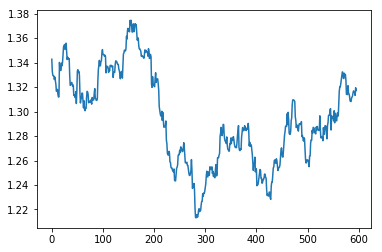

(596, 167)

In [1250]:
plt.plot(historical_data['CAD'].values[::-1])
plt.show()

historical_data.shape

In [1251]:
vals = historical_data['ZMW'].values[::-1]
dates = historical_data['Date'].values[::-1]

print(vals.shape)

(596,)


In [1252]:
data_split = 0.8

data_past = vals[0:int(data_split*len(vals))]
data_past_dates = dates[0:int(data_split*len(vals))]

data_future = vals[int(data_split*len(vals)):]
data_future_dates = dates[int(data_split*len(vals)):]

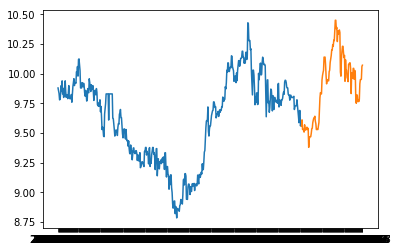

In [1253]:
plt.plot(data_past_dates, data_past)
plt.plot(data_future_dates, data_future)
plt.show()

In [1254]:
def transform_timeseries(data, n=3, t=1):
    X = []
    Y = []
    for i in range(len(data)-n-t+1):
        X.append(data[i:i+n])
        Y.append(data[i+n+t-1])
    return X, Y

In [1255]:
n = 2
t = 2
X_past, Y_past = transform_timeseries(data_past, n, t)
X_future, Y_future = transform_timeseries(data_future, n, t)

In [1256]:
for ix, i in enumerate(zip(X_past, Y_past)):
    print(i[0], i[1])
    
    if ix>5:break
print('----------------------------')
for ix, i in enumerate(zip(X_future, Y_future)):
    print(i[0], i[1])
    
    if ix>5:break

[ 9.87998974  9.85698049] 9.779999733
[ 9.85698049  9.83320186] 9.7839994541
[ 9.83320186  9.77999973] 9.8301535243
[ 9.77999973  9.78399945] 9.8992795363
[ 9.78399945  9.83015352] 9.8508003845
[ 9.83015352  9.89927954] 9.9400005336
[ 9.89927954  9.85080038] 9.8299893512
----------------------------
[ 9.56023312  9.61131755] 9.5301625819
[ 9.61131755  9.53016156] 9.5301626229
[ 9.53016156  9.53016258] 9.5083457373
[ 9.53016258  9.53016262] 9.5699407004
[ 9.53016262  9.50834574] 9.5250256928
[ 9.50834574  9.5699407 ] 9.5258239179
[ 9.5699407   9.52502569] 9.5301227452


The models

In [1257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1258]:
X_train, X_valid, y_train, y_valid = train_test_split(X_past, Y_past, 
                                                    test_size=0.33, 
                                                    shuffle= False)

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Training Score  : ', lineReg.score(X_train, y_train))
print('Validation Score: ', lineReg.score(X_valid, y_valid))

Training Score  :  0.943809196436
Validation Score:  0.647503286214


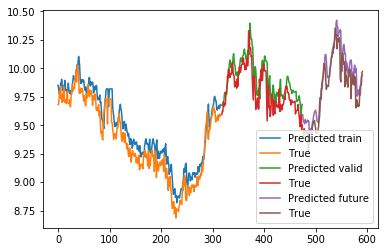

In [1261]:
plt.plot(lineReg.predict(X_train), label='Predicted train')
plt.plot(np.add(-0.1, y_train), label='True')

xs = range(len(y_train) + t, 
           len(y_train) + len(y_valid) + t)
plt.plot(xs, lineReg.predict(X_valid), label='Predicted valid')
plt.plot(xs, np.add(-0.1, y_valid), label='True')

xs = range(len(y_train) + len(y_valid) + t, 
           len(y_train) + len(y_valid) + len(Y_future) + t)
plt.plot(xs, lineReg.predict(X_future), label='Predicted future')
plt.plot(xs, np.add(-0.1, Y_future), label='True')

plt.legend()
plt.show()

In [1109]:
def transform_timeseries(data, n=3, t=1):
    X = []
    Y = []
    for i in range(len(data)-n-t+1):
        X.append(data[i:i+n])
        Y.append(data[i+n+t-1])
    return X, Y

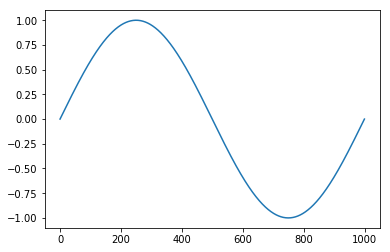

(1000,)


In [1110]:
data = np.sin(np.linspace(0, 2*np.pi, 1000))
ixs = range(len(data))

plt.plot(ixs, data)
plt.show()

print(data.shape)

(800,)
(200,)


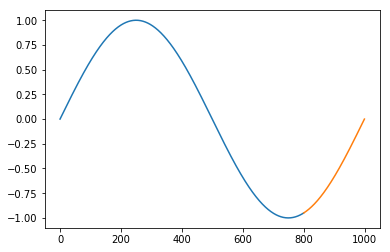

In [1111]:
data_split = 0.8

data_past = data[0:int(data_split*len(data))]
ix_past = ixs[0:int(data_split*len(ixs))]
data_future = data[int(data_split*len(data)):]
ix_future = ixs[int(data_split*len(ixs)):]

print(data_past.shape)
print(data_future.shape)

plt.plot(ix_past, data_past)
plt.plot(ix_future, data_future)
plt.show()

In [1113]:
n = 2
t = 30
X_past, Y_past = transform_timeseries(data_past, n, t)
X_future, Y_future = transform_timeseries(data_future, n, t)

In [1114]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_past, Y_past, 
                                                    test_size=0.33, 
                                                    shuffle= False)

In [1126]:
from sklearn.linear_model import LinearRegression

lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Training Score  : ', lineReg.score(X_train, y_train))
print('Validation Score: ', lineReg.score(X_valid, y_valid))

Training Score  :  1.0
Validation Score:  1.0


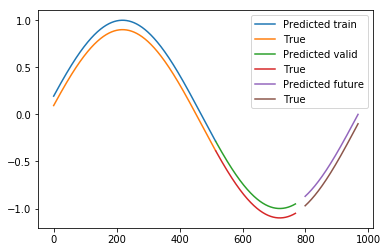

In [1131]:
plt.plot(lineReg.predict(X_train), label='Predicted train')
plt.plot(np.subtract(y_train, 0.1), label='True')

xs = range(len(y_train), 
           len(y_train) + len(y_valid))
plt.plot(xs, lineReg.predict(X_valid), label='Predicted valid')
plt.plot(xs, np.subtract(y_valid, 0.1), label='True')

xs = range(len(y_train) + len(y_valid) + t, 
           len(y_train) + len(y_valid) + len(Y_future) + t)
plt.plot(xs, lineReg.predict(X_future), label='Predicted future')
plt.plot(xs, np.subtract(Y_future, 0.1), label='True')

plt.legend()
plt.show()